In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import timeit

In [3]:
np.random.seed(0)
T = 1 # time length
N = 252 # number of steps in 1 unit time
S_0 = 100 # initial stock price
K = 90 # strike price
r = 0 # expected return rate = risk-free rate in risk-neutral world
sigma = 0.3 # volatility

## 1. Simulate Stock Prices using Geometric Brownian Motion

$S_t = S_0 \exp{((r - \sigma^2 / 2) t + \sigma B_t)}$

In [4]:
def simulate_stock(S_0, T, N, r, sigma):
    # This function simulates stock prices in a time period using Geometric Brownian Motion.
    # S_0: current stock price
    # T: time length (positive integer)
    # N: number of steps (positive integer)
    # r: free-interest rate
    # sigma: volatility
    b = np.array([0])
    mu, sigma_ = 0, math.sqrt(T / N) # mean and standard deviation different from the global r and sigma
    s = np.append(0, np.random.normal(mu, sigma_, N))
    B_t = np.cumsum(s)
    t = np.linspace(0, 1, N + 1)
    S_t = S_0 * np.exp((r - 1 / 2 * sigma ** 2) * t + sigma * B_t)
    return S_t

Text(0.5, 1.0, 'Stock Prices with Geometric Brownian Motion')

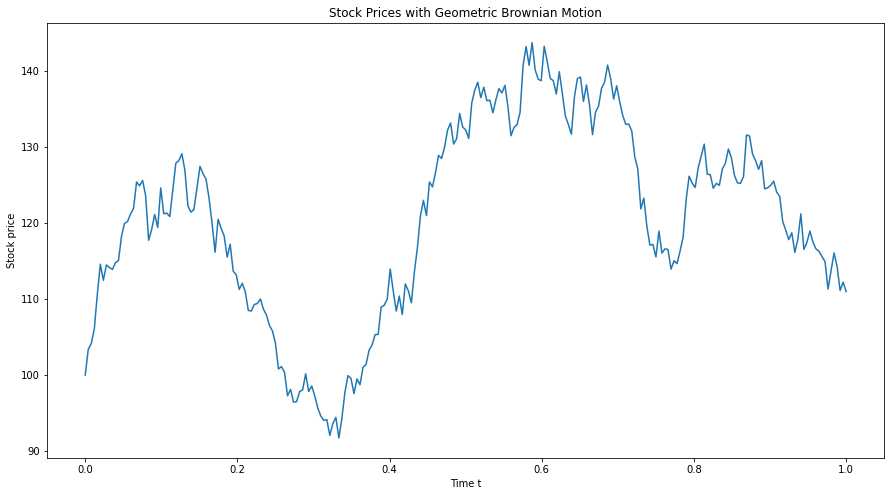

In [5]:
S_t = simulate_stock(S_0, T, N, r, sigma)
t = np.linspace(0, 1, N + 1)
plt.figure(figsize=(15,8))
plt.plot(t, S_t)
plt.ylabel("Stock price")
plt.xlabel("Time t")
plt.title("Stock Prices with Geometric Brownian Motion")

## 2. Monte Carlo Simulation for Stock Price and Asian Option Pricing

In [14]:
def MCS_asian_option_pricing(S_0, K, r, T, sigma, option_type, strike_type, M = 10000):
    '''
    This function culculate different types of Asian option using Monte Carlo Simulation
    S_0: stock price at time 0
    K: strike price (not used when isAveStrike = True)
    r: risk-free rate
    T: maturity date
    sigma: volatility
    option_type: "call" or "put"
    strike_type: "fixed" or "floating" call payoffs are max(0, S_ave - K), max(0, S_T - S_ave) respectively
    M: number of trails of MCS
    '''
#     avoid using function inside function!!
#     def calc_payoff(S_T):
#         '''
#         Return the payoff base on the types of Asian option
#         S_T: stock price at maturity
#         '''
#         if option_type == "call":
#             payoff = np.maximum(0, S_ave - K) if strike_type == "fixed" else np.maximum(0, S_T - S_ave)
#         elif option_type == "put":
#             payoff = np.maximum(0, K - S_ave) if strike_type == "fixed" else np.maximum(0, S_ave - S_T)
#         return payoff
    payoffs = np.zeros(M)
    for x in range(M):
        S_t = simulate_stock(S_0, T, N, r, sigma)
        S_ave = np.mean(S_t)
        # calculate payoffs
        payoff = 0
        if option_type == "call":
            payoff = np.maximum(0, S_ave - K) if strike_type == "fixed" else np.maximum(0, S_t[-1] - S_ave)
        elif option_type == "put":
            payoff = np.maximum(0, K - S_ave) if strike_type == "fixed" else np.maximum(0, S_ave - S_t[-1])
        payoffs[x] = payoff
    return np.exp(-1 * r * T) * np.mean(payoffs)

### 2.1  Asian call option

In [10]:
number_of_simulations = np.array([100, 300, 600, 1000, 5000,  15555,  26111, 6666,  47222,  57777,  68333,  78888,  89444, 100000])

### fixed-strike

fixed-strike Asian call price:  12.630725182084452
Time:  34.378860300000014


Text(0.5, 1.0, 'Price convergence of Monte Carlo Simulation')

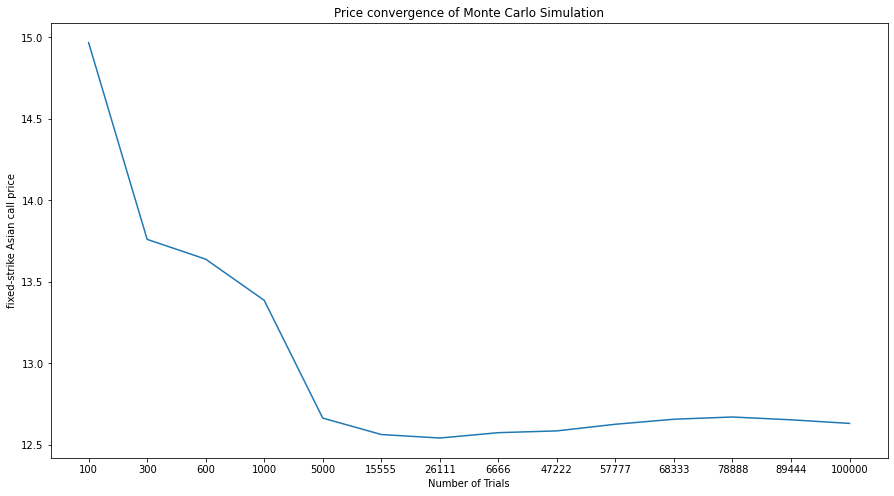

In [13]:
fixed_strike_call_prices = np.zeros(len(number_of_simulations))
start = timeit.default_timer()
for x in range(len(number_of_simulations)):
    np.random.seed(1)
    fixed_strike_call_prices[x] = MCS_asian_option_pricing(S_0, K, r, T, sigma, "call", "fixed", number_of_simulations[x])
stop = timeit.default_timer()
print("fixed-strike Asian call price: ", fixed_strike_call_prices[-1])
print("Time: ", stop - start) 
plt.figure(figsize=(15,8))
plt.plot([str(x) for x in number_of_simulations], fixed_strike_call_prices)
plt.ylabel("fixed-strike Asian call price")
plt.xlabel("Number of Trials")
plt.title("Price convergence of Monte Carlo Simulation")

### floating-strike

floating-strike Asian call price:  6.893399802511516
Time:  46.7842238000012


Text(0.5, 1.0, 'Price convergence of Monte Carlo Simulation')

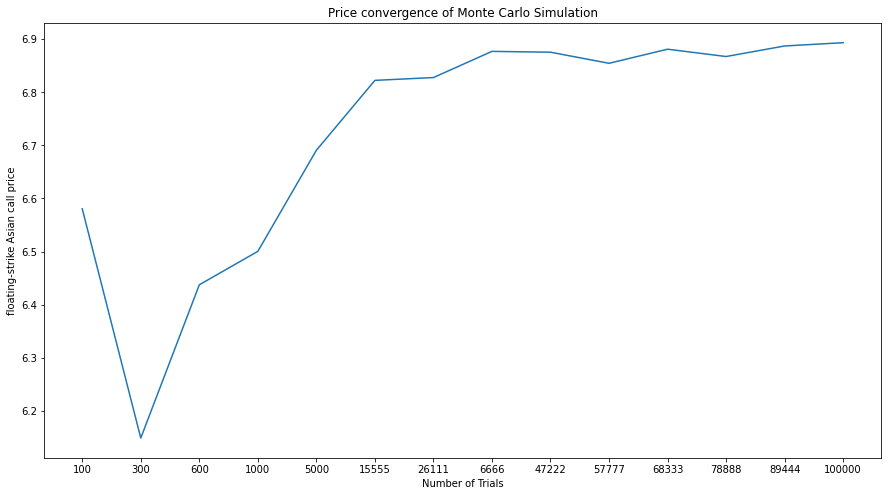

In [331]:
floating_strike_call_prices = np.zeros(len(number_of_simulations))
for x in range(len(number_of_simulations)):
    np.random.seed(2)
    floating_strike_call_prices[x] = MCS_asian_option_pricing(S_0, K, r, T, sigma, "call", "floating", number_of_simulations[x])
print("floating-strike Asian call price: ", floating_strike_call_prices[-1])
print("Time: ", stop - start) 
plt.figure(figsize=(15,8))
plt.plot([str(x) for x in number_of_simulations], floating_strike_call_prices)
plt.ylabel("floating-strike Asian call price")
plt.xlabel("Number of Trials")
plt.title("Price convergence of Monte Carlo Simulation")

### 2.2 Asian put option

### fixed-strike

fixed-strike Asian put price:  2.634177690185919
Time:  46.7842238000012


Text(0.5, 1.0, 'Price convergence of Monte Carlo Simulation')

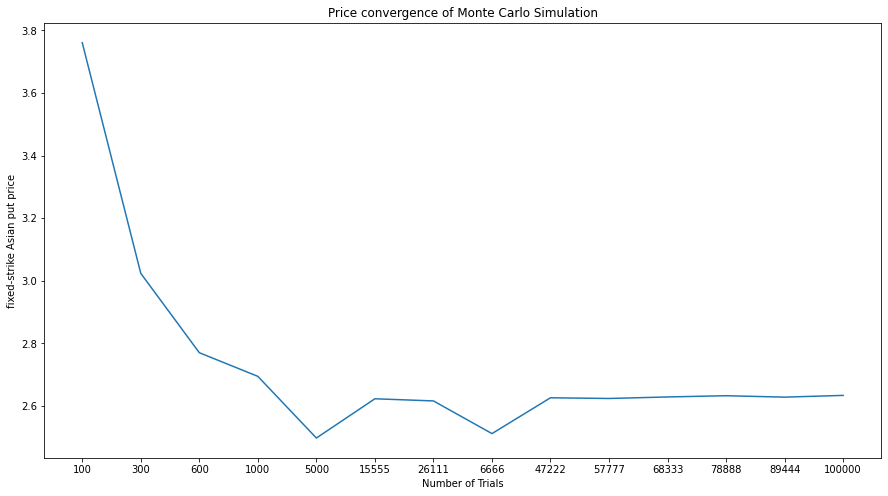

In [332]:
fixed_strike_put_prices = np.zeros(len(number_of_simulations))
for x in range(len(number_of_simulations)):
    np.random.seed(3)
    fixed_strike_put_prices[x] = MCS_asian_option_pricing(S_0, K, r, T, sigma, "put", "fixed", number_of_simulations[x])
print("fixed-strike Asian put price: ", fixed_strike_put_prices[-1])
print("Time: ", stop - start) 
plt.figure(figsize=(15,8))
plt.plot([str(x) for x in number_of_simulations], fixed_strike_put_prices)
plt.ylabel("fixed-strike Asian put price")
plt.xlabel("Number of Trials")
plt.title("Price convergence of Monte Carlo Simulation")

### floating-strike

floating-strike Asian put price:  6.940314109526401
Time:  46.7842238000012


Text(0.5, 1.0, 'Price convergence of Monte Carlo Simulation')

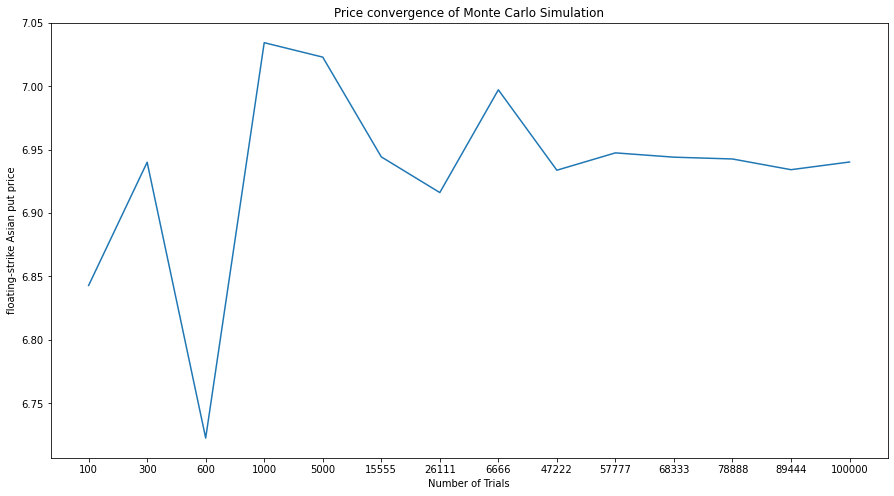

In [333]:
floating_strike_put_prices = np.zeros(len(number_of_simulations))
for x in range(len(number_of_simulations)):
    np.random.seed(4)
    floating_strike_put_prices[x] = MCS_asian_option_pricing(S_0, K, r, T, sigma, "put", "floating", number_of_simulations[x])
print("floating-strike Asian put price: ", floating_strike_put_prices[-1])
print("Time: ", stop - start) 
plt.figure(figsize=(15,8))
plt.plot([str(x) for x in number_of_simulations], floating_strike_put_prices)
plt.ylabel("floating-strike Asian put price")
plt.xlabel("Number of Trials")
plt.title("Price convergence of Monte Carlo Simulation")
